In [2]:
import tensorflow as tf

print("="*50)
print("Google Collab Setup check")
print("="*50)

gpu_devices = tf.config.list_physical_devices('GPU')

if gpu_devices:
  print(f"Gpu Enabled: {gpu_devices[0].name}")
  print(f"Type: {gpu_devices[0].device_type}")

else:
  print("No GPU")

print(f"TensorFlow version:{tf.__version__}")

Google Collab Setup check
Gpu Enabled: /physical_device:GPU:0
Type: GPU
TensorFlow version:2.19.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

plt.style.use('default')
sns.set_palette('husl')

In [4]:
#loading dataset
print("="*50)
print('Loading MNIST dataset.....')
print("="*50)

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

print("="*50)
print("DataSet loaded successfully")
print("="*50)

print(f"Training images: {x_train.shape[0]:,} images")
print(f"Test images: {x_test.shape[0]:,} images")
print(f"Image size:{x_train.shape[1]}x{x_train.shape[2]} pixels")
print(f"Pixel values: {x_train.min()}(black) to {x_train.max()}(white)")
print(f"Number of classes: {len(np.unique(y_train))} (digits 0-9)")
print("="*50)

Loading MNIST dataset.....
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
DataSet loaded successfully
Training images: 60,000 images
Test images: 10,000 images
Image size:28x28 pixels
Pixel values: 0(black) to 255(white)
Number of classes: 10 (digits 0-9)


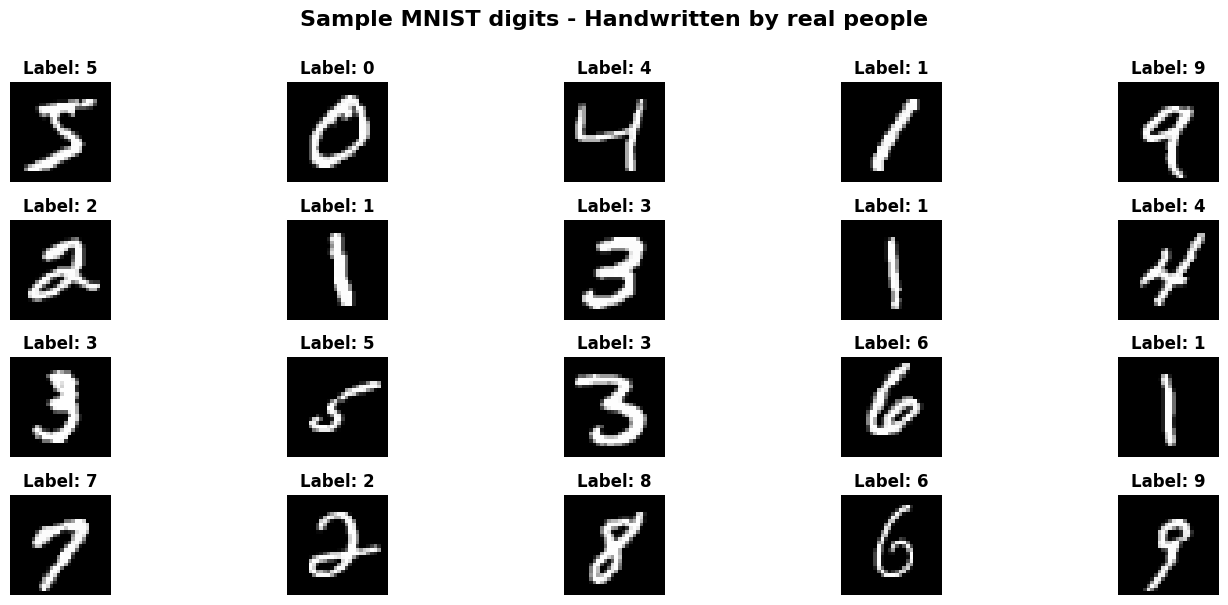


 These are real Handwritten digits!


In [5]:
#visualization

plt.figure(figsize=(15,6))

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}", fontsize=12, fontweight = 'bold')
  plt.axis('off')

plt.suptitle('Sample MNIST digits - Handwritten by real people', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print('\n These are real Handwritten digits!')

In [6]:
#preprocessing of data

print("="*50)
print('Preprocessing data....\n')
print("="*50)

x_train_normalized = x_train.astype('float32')/255.0
x_test_normalized = x_test.astype('float32')/255.0

x_train_flat = x_train_normalized.reshape(60000, 28*28)
x_test_flat = x_test_normalized.reshape(10000, 28*28)

print("="*50)
print('Preprocessing complete')
print("="*50)

print(f"Original shape: {x_train.shape} (60k images, 28*28 pixels)")
print(f"New shape: {x_train_flat.shape} (60k images, 784 features)")

print(f"\nPixel Range: [0,255]-> [0.0, 1.0]")
print(f"Each 28*28 images -> 784-length array")
print("="*50)



Preprocessing data....

Preprocessing complete
Original shape: (60000, 28, 28) (60k images, 28*28 pixels)
New shape: (60000, 784) (60k images, 784 features)

Pixel Range: [0,255]-> [0.0, 1.0]
Each 28*28 images -> 784-length array


In [7]:
#Building the Neural Network

print("="*50)
print("Building the neural network Architecture....\n")
print("="*50)

model = keras.Sequential([
    layers.Dense(128, activation= 'relu', input_shape=(784,)),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

print("="*50)
print("\nNeural Network architecture")
print("="*50)

model.summary()

print()
print("="*50)
print("Architecture breakdown")
print("="*50)
print("Input Layer: 784 neurons (one per pixel)")
print("  ↓")
print("Hidden Layer 1: 128 neurons")
print("  → ReLU activation (kills negative values)")
print("  ↓")
print("Hidden Layer 2: 64 neurons")
print("  → ReLU activation")
print("  ↓")
print("Output Layer: 10 neurons (one per digit)")
print("  → Softmax activation (converts to probabilities)")
print("="*50)

total_params = model.count_params()
print(f"\nTotal Parameters to Learn: {total_params:,}")
print("   These are the 'weights' that will be adjusted during training!")
print("   The network will learn which pixels matter for each digit!")

Building the neural network Architecture....



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Architecture breakdown
Input Layer: 784 neurons (one per pixel)
  ↓
Hidden Layer 1: 128 neurons
  → ReLU activation (kills negative values)
  ↓
Hidden Layer 2: 64 neurons
  → ReLU activation
  ↓
Output Layer: 10 neurons (one per digit)
  → Softmax activation (converts to probabilities)

Total Parameters to Learn: 109,386
   These are the 'weights' that will be adjusted during training!
   The network will learn which pixels matter for each digit!


In [8]:
#Compile the model

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

print("="*50)
print("Model compilation complete")
print("="*50)
print("  Optimizer: Adam")
print("Training config")
print("    → Automatically adjusts how fast the network learns")
print("    → Smart about not getting stuck")
print("\n  Loss Function: Sparse Categorical Crossentropy")
print("    → Measures prediction error")
print("    → Lower = better")
print("\n  Metric: Accuracy")
print("    → % of correct predictions")
print("    → Higher = better")
print("="*50)


Model compilation complete
  Optimizer: Adam
Training config
    → Automatically adjusts how fast the network learns
    → Smart about not getting stuck

  Loss Function: Sparse Categorical Crossentropy
    → Measures prediction error
    → Lower = better

  Metric: Accuracy
    → % of correct predictions
    → Higher = better


In [9]:
#Train the model

print("="*50)
print("Model Training")
print("="*50)

history = model.fit(
    x_train_flat,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2,
    verbose = 1
)

print("="*50)
print("Training complete")
print("="*50)
print("\nThe Neural network just learned to recognize handwritten digits!")
print("It adjusted 101,770 parameters 10 times to minimize error!")

Model Training
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8051 - loss: 0.6919 - val_accuracy: 0.9486 - val_loss: 0.1811
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9512 - loss: 0.1648 - val_accuracy: 0.9629 - val_loss: 0.1342
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1096 - val_accuracy: 0.9664 - val_loss: 0.1152
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0790 - val_accuracy: 0.9698 - val_loss: 0.1046
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9812 - loss: 0.0644 - val_accuracy: 0.9706 - val_loss: 0.1031
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0529 - val_accuracy: 0.9694 - val_loss: 0.1005
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0396 - val_accuracy: 0.9698 - val_loss: 0.1109
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0320 - v

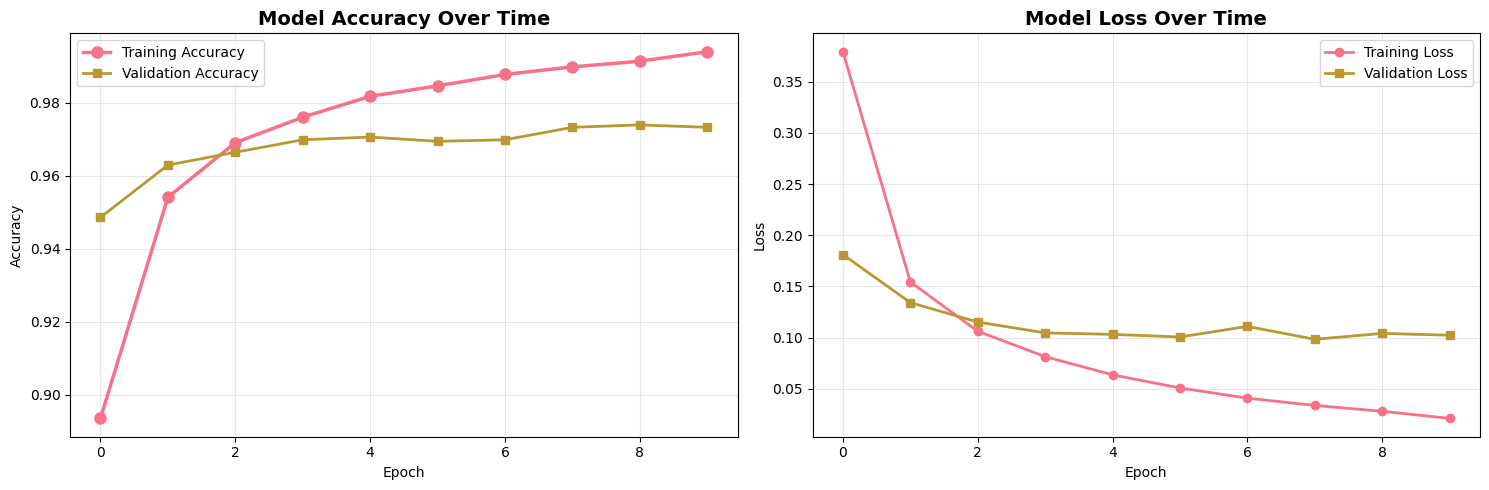

In [10]:
#Visualization

fig,axes = plt.subplots(1,2,figsize=(15,5))


#plot 1 accuracy over epoch
axes[0].plot(history.history['accuracy'], label='Training Accuracy',
             marker = 'o', linewidth = 2.5, markersize = 8)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s', linewidth=2)
axes[0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#plot 2 loss over epoch
axes[1].plot(history.history['loss'], label='Training Loss', marker='o', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s', linewidth=2)
axes[1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
#Testing on unseen data

print("="*50)
print("Testing on unseen images")
print("="*50)


test_loss , test_accuracy = model.evaluate(x_test_flat , y_test, verbose = 0)

print("━" * 50)
print("Final results")
print("━" * 50)

print(f"Test loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


print(f"Out of 10k test images, it got ~{int(test_accuracy*10000)} correct\n")

Testing on unseen images
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Final results
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Test loss: 0.0844
Test Accuracy: 97.76%
Out of 10k test images, it got ~9775 correct



Prediction Visualization


/tmp/ipython-input-1285199000.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1285199000.py:34: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


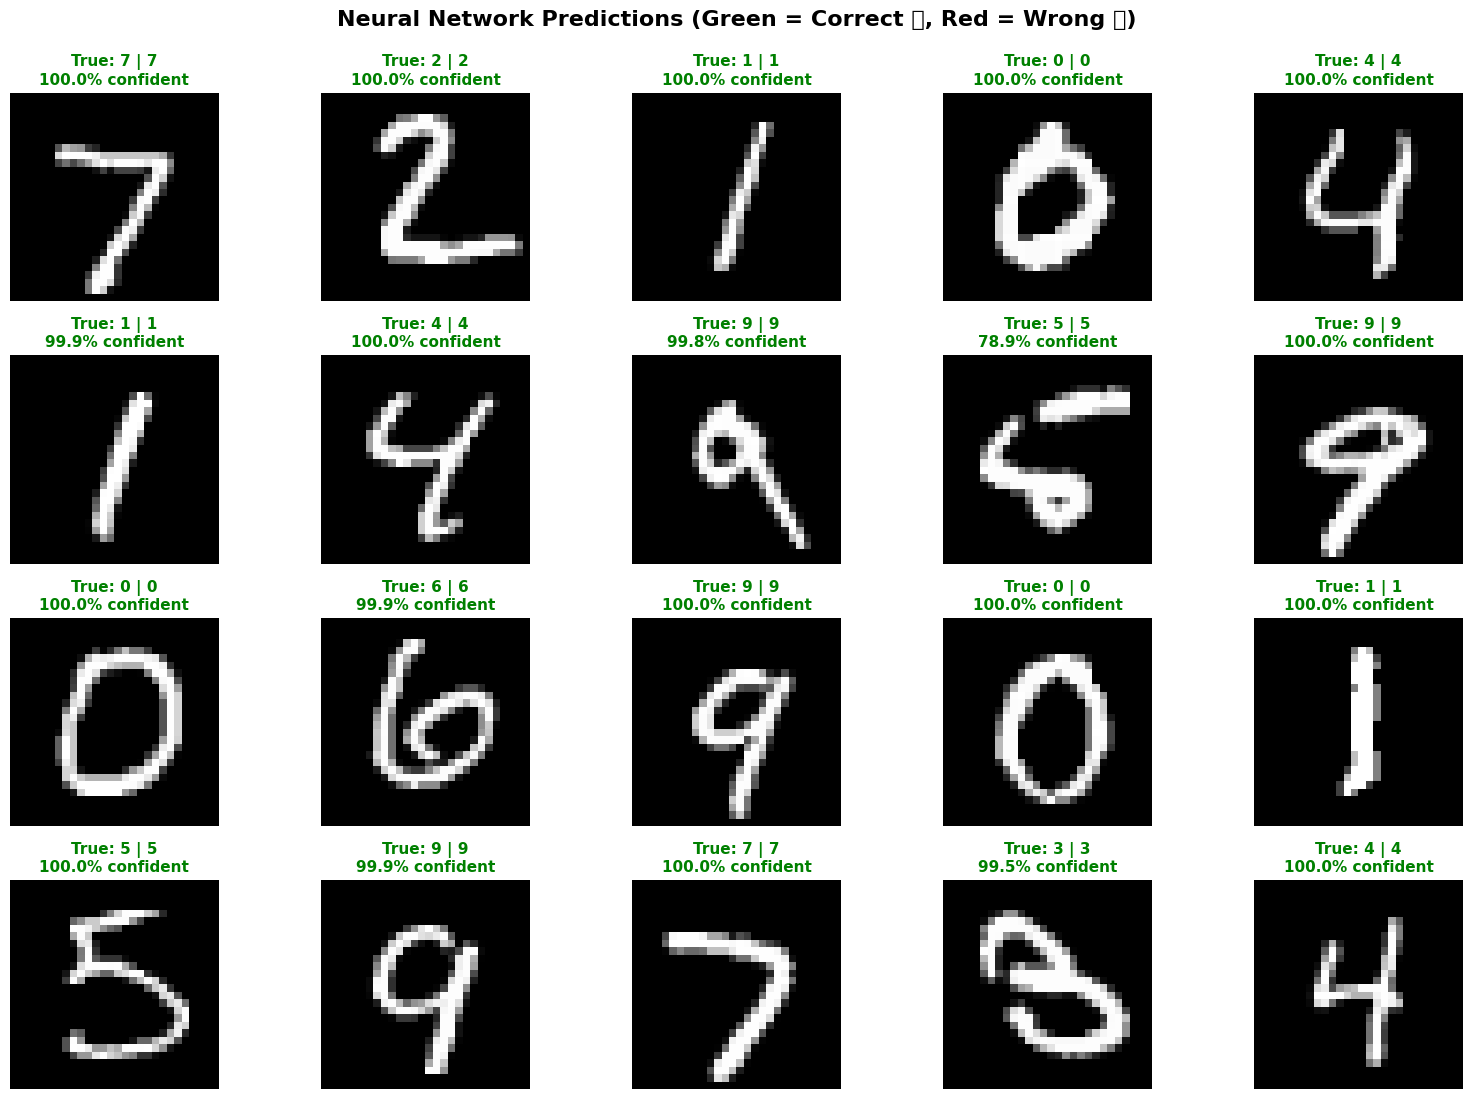


Got 20 out of 20 correct! (100%)


In [15]:
#prediction visualization

print("="*50)
print('Prediction Visualization')
print("="*50)

#predict on the first 20 test images
predictions = model.predict(x_test_flat[:20], verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

fig,axes = plt.subplots(4, 5, figsize=(16,11))
axes = axes.ravel()

for i in range(20):
  axes[i].imshow(x_test[i], cmap= 'gray')
  true_label = y_test[i]
  pred_label = predicted_labels[i]
  confidence = predictions[i][pred_label]*100

  color = 'green' if true_label == pred_label else 'red'

  axes[i].set_title(
      f"True: {true_label} | {pred_label}\n{confidence:.1f}% confident",
      fontsize = 11,
      color = color,
      fontweight = 'bold'
  )
  axes[i].axis('off')


plt.suptitle("Neural Network Predictions (Green = Correct ✅, Red = Wrong ❌)",
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


correct = np.sum(predicted_labels == y_test[:20])
print(f"\nGot {correct} out of 20 correct! ({correct/20*100:.0f}%)")

Confusion Matrix for all 10k test images


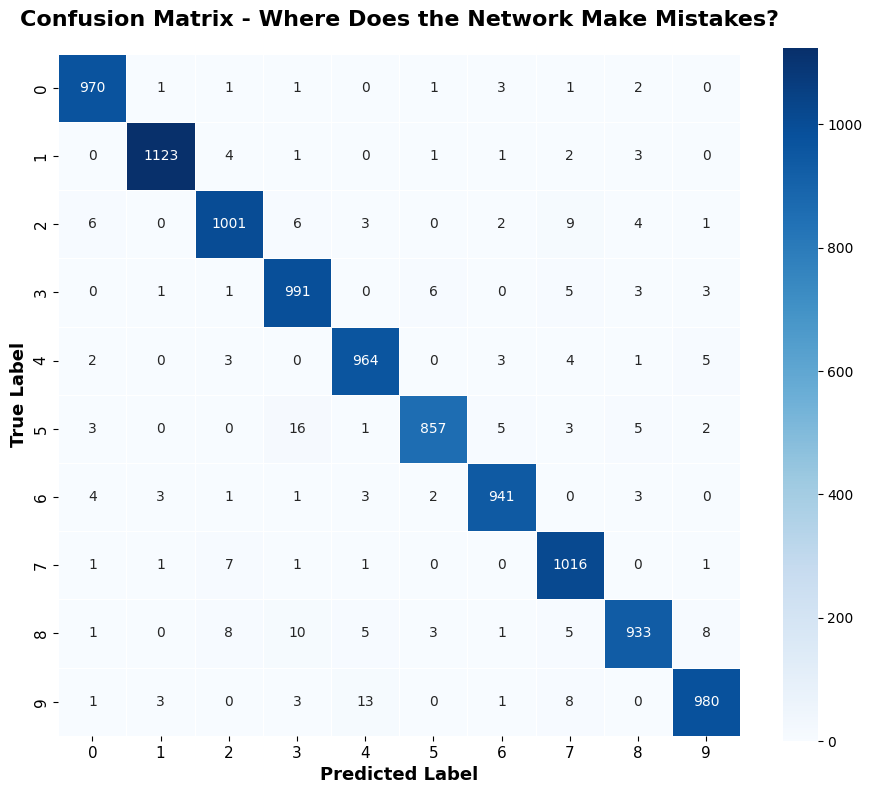


How To Read This:
• Diagonal (top-left to bottom-right) = CORRECT predictions
• Off-diagonal = MISTAKES
• Darker blue = more images

Common confusions to look for:
  • 4 vs 9 (similar curved shapes)
  • 3 vs 5 (both have curves)
  • 7 vs 1 (both are straight/angled)
  • 8 vs 3 (similar loops)

Most confused pair: 5 mistaken as 3
Happened 16 times


In [17]:
#confusion Matrix

print("="*50)
print("Confusion Matrix for all 10k test images")
print("="*50)

all_predictions = model.predict(x_test_flat, verbose=0)
all_predicted_labels =np.argmax(all_predictions, axis=1)

cm = confusion_matrix(y_test, all_predicted_labels)

plt.figure(figsize=(11,9))
sns.heatmap(cm, annot=True, fmt= 'd', cmap= 'Blues',
            cbar= True, square= True, linewidths= 0.5)

plt.title('Confusion Matrix - Where Does the Network Make Mistakes?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

print("\n" + "=" * 60)
print("How To Read This:")
print("=" * 60)
print("• Diagonal (top-left to bottom-right) = CORRECT predictions")
print("• Off-diagonal = MISTAKES")
print("• Darker blue = more images")
print("\nCommon confusions to look for:")
print("  • 4 vs 9 (similar curved shapes)")
print("  • 3 vs 5 (both have curves)")
print("  • 7 vs 1 (both are straight/angled)")
print("  • 8 vs 3 (similar loops)")


cm_copy = cm.copy()
np.fill_diagonal(cm_copy, 0)
max_confusion = np.unravel_index(cm_copy.argmax(), cm_copy.shape)
print(f"\nMost confused pair: {max_confusion[0]} mistaken as {max_confusion[1]}")
print(f"Happened {cm_copy[max_confusion]} times")

In [26]:
#performance for each digit

print("="*50)
print('Classification report')
print("="*50)
print(classification_report(y_test, all_predicted_labels,
                          target_names=[f'Digit {i}' for i in range(10)],
                          digits=4))

print()
print("="*50)
print('Metric explained')
print("="*50)
print("Precision: When model says it's a '5', how often is it really a 5?")
print("Recall: Out of all real 5s in test set, how many did it find?")
print("F1-Score: Harmonic mean of precision & recall (balanced metric)")
print("Support: How many of each digit exist in the test set")
print("="*50)

report_dict = classification_report(y_test, all_predicted_labels, output_dict = True)
f1_scores = {i: report_dict[str(i)]['f1-score'] for i in range(10)}
best_digit = max(f1_scores, key=f1_scores.get)
worst_digit = min(f1_scores, key=f1_scores.get)

print(f"\nBest performing digits: {best_digit} (f1: {f1_scores[best_digit]:.4f})")
print(f"\nworst performing digits: {worst_digit} (f1: {f1_scores[worst_digit]:.4f})")

Classification report
              precision    recall  f1-score   support

     Digit 0     0.9818    0.9898    0.9858       980
     Digit 1     0.9920    0.9894    0.9907      1135
     Digit 2     0.9756    0.9700    0.9728      1032
     Digit 3     0.9621    0.9812    0.9716      1010
     Digit 4     0.9737    0.9817    0.9777       982
     Digit 5     0.9851    0.9608    0.9728       892
     Digit 6     0.9833    0.9823    0.9828       958
     Digit 7     0.9649    0.9883    0.9765      1028
     Digit 8     0.9780    0.9579    0.9678       974
     Digit 9     0.9800    0.9713    0.9756      1009

    accuracy                         0.9776     10000
   macro avg     0.9777    0.9773    0.9774     10000
weighted avg     0.9777    0.9776    0.9776     10000


Metric explained
Precision: When model says it's a '5', how often is it really a 5?
Recall: Out of all real 5s in test set, how many did it find?
F1-Score: Harmonic mean of precision & recall (balanced metric)
Support:

In [27]:
print("="*50)
print('First Neural Network done')
print("="*50)

First Neural Network done
